# Assignment 1

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python')

## Question 1

In [2]:
# using pandas to aggregate movie ratings for each particular genre

mergeData = pd.merge(pd.merge(users, ratings), movies)
aggregate_ratings = mergeData.pivot_table('rating', index='genres', aggfunc='mean')
aggregate_ratings.head(10)

genres
Action                                           3.354886
Action|Adventure                                 3.676814
Action|Adventure|Animation                       4.147826
Action|Adventure|Animation|Children's|Fantasy    2.703704
Action|Adventure|Animation|Horror|Sci-Fi         3.546926
Action|Adventure|Children's                      1.318182
Action|Adventure|Children's|Comedy               2.306950
Action|Adventure|Children's|Fantasy              2.090909
Action|Adventure|Children's|Sci-Fi               1.874286
Action|Adventure|Comedy                          3.095330
Name: rating, dtype: float64

## Question 2

In [3]:
# find the top 5 highest ranked genre by women

women = mergeData[mergeData['gender'] == 'F']
genre_by_gender = women.pivot_table('rating', index="genres", columns='gender', aggfunc='mean')
top_five_by_women = genre_by_gender.sort_values('F', ascending=False)
top_five_by_women.head(5)

gender,F
genres,
Animation|Comedy|Thriller,4.550802
Animation,4.533333
Film-Noir|Romance|Thriller,4.448718
Sci-Fi|War,4.376623
Adventure|Children's|Drama|Musical,4.355030


## Question 3

In [4]:
# find the top 5 highest ranked genre by women

men = mergeData[mergeData['gender'] == 'M']
genre_by_gender = men.pivot_table('rating', index="genres", columns='gender', aggfunc='mean')
top_five_by_men = genre_by_gender.sort_values('M', ascending=False)
top_five_by_men.head(5)

gender,M
genres,
Sci-Fi|War,4.464789
Animation|Comedy|Thriller,4.445110
Film-Noir|Mystery,4.381536
Adventure|War,4.376633
Animation,4.353107


## Question 4

In [5]:
# A breakdown of a movie’s ratings by age, use any movie of your choice

movie = mergeData[mergeData['title'] == 'Dirty Dancing (1987)']
rating_by_age = movie.pivot_table('rating', index='age', aggfunc='mean')
rating_by_age

age
1     4.133333
18    3.364407
25    3.021818
35    3.343511
45    3.533333
50    3.792453
56    3.828571
Name: rating, dtype: float64

## Question 5

In [6]:
# A function that given a user_id and movie_id , 
# returns a list of user_ids for other users that rated the movie 
# identified by the provided movie_id with the same score
def same_movie_rating(user_id, movie_id):
    rating = mergeData['rating'][(mergeData['user_id'] == user_id) & (mergeData['movie_id'] == movie_id)]
    if rating.size > 0:
        rating = rating.iloc[0]
    else:
        return []
    
    list_users = mergeData['user_id'][(mergeData['rating']==rating) & (mergeData['movie_id']==movie_id) & (mergeData['user_id']!=user_id)]
    return list(list_users)

print(same_movie_rating(1, 1193)[:10])

[2, 17, 19, 24, 33, 39, 53, 54, 58, 81]


## Question 6

In [7]:
# Some other statistic, figure, data aggregate, 
# or plot that you created using this dataset, 
# along with a short description of what interesting observations you derived from it

# find the mean and total size of each genre at different ages
age = mergeData.groupby(['genres','age']).agg({'rating':[np.size, np.mean]})
age['rating'].head(10)

# to find specific genre
# age['rating'].loc[genreName]

# continue next

size      mean
genres           age                
Action           1     282  3.393617
                 18   2075  3.233253
                 25   5053  3.282209
                 35   2587  3.460765
                 45    952  3.442227
                 50    935  3.527273
                 56    427  3.566745
Action|Adventure 1     231  3.632035
                 18   2020  3.636634
                 25   4161  3.713771

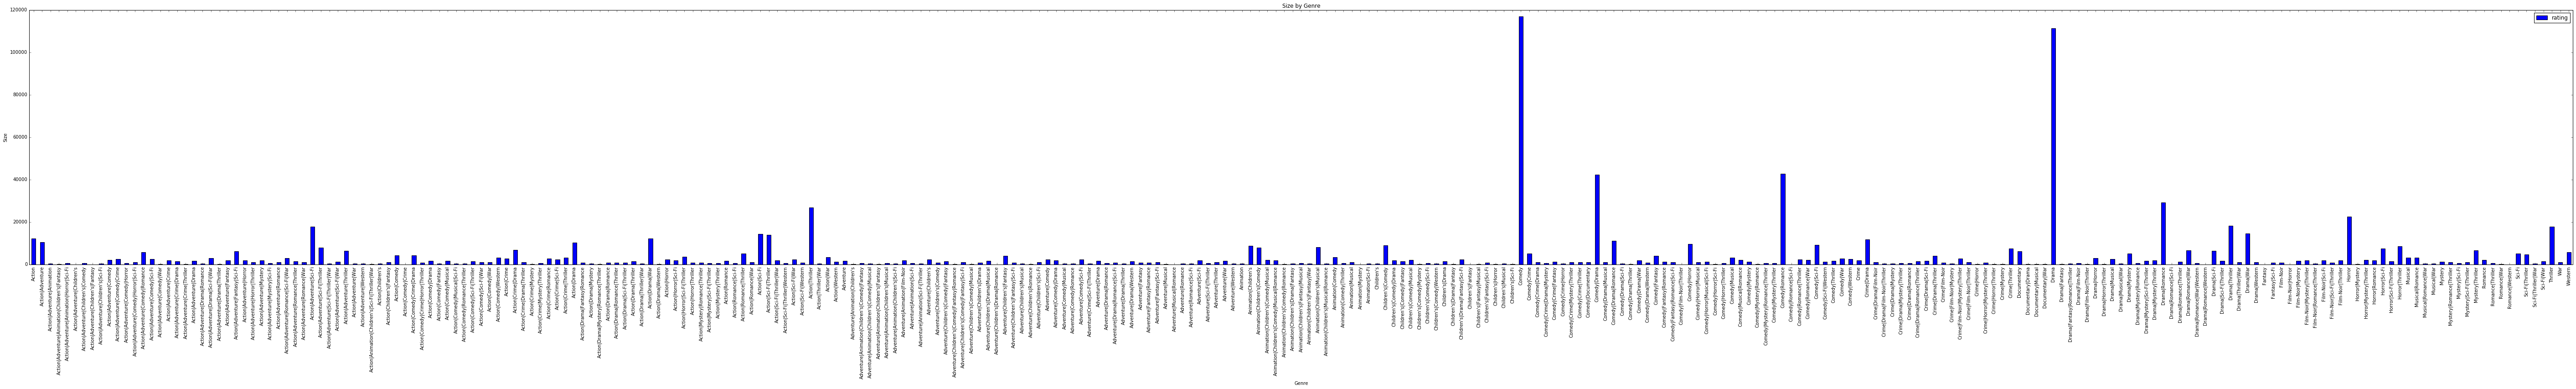

In [8]:
# plot size to each genre
genreSize = mergeData.groupby('genres').agg({'rating':np.size})
genreSize.plot(kind='bar',figsize=[100,10])
plt.title("Size by Genre")
plt.ylabel("Size")
plt.xlabel("Genre")

# from below graph, Comedy has the most ratings

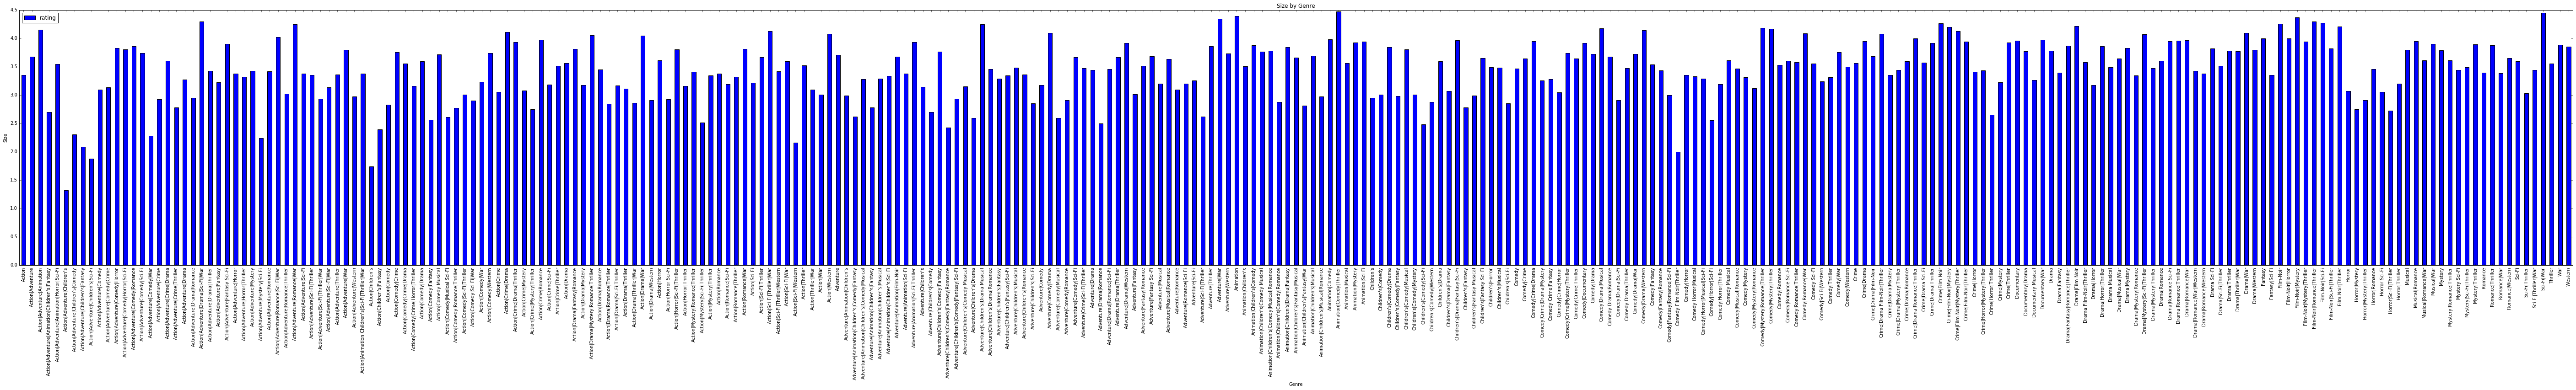

In [9]:
# plot mean to each genre
genreMean = mergeData.groupby('genres').agg({'rating':np.mean})
genreMean.plot(kind='bar',figsize=[100,10])
plt.title("Size by Genre")
plt.ylabel("Size")
plt.xlabel("Genre")

# from the below graph, most genres have above 3.0 rating and many are above 4